In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("wetransfer-2ee104//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  
    
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]    

In [78]:
def l1_with_lag(timeseries1, timeseries2, number_of_days = 7):
    list_of_l1 = []
    length = len(timeseries1)
    sum = 0
    for lag in range(0, 288*number_of_days):
        ls1 = timeseries1.tolist()[0:(length-lag)]
        ls2 = timeseries2.tolist()[lag:]
        for x in range (0,len(ls1)):
            sum += np.abs(ls1[x]-ls2[x])

        list_of_l1.append(sum/(length - lag))
        sum = 0
    
    return list_of_l1

def plot_l1_with_lag(index1, index2, l1_with_lag_input):
    
    plt.figure(figsize=(20,5))
    plt.grid()
    plt.plot(x_axis[0:len(l1_with_lag_input)],l1_with_lag_input, color = 'blue')
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("L1 Distance between Machine " + str(index1) + " and Machine " + str(index2)) 
    plt.set_ylim(ymin=0)
    plt.xlabel("Lag on Machine " + str(index2))  
    plt.ylabel("L1 Distance") 
    plt.show()

def l1_details(index1, index2, l1_list, details = True):
    index_of_smallest = l1_list.index(min(l1_list))
    difference =  l1_list[0] - l1_list[index_of_smallest]
    if(details):    
        print("Lowest L1 happen at index " + str(index_of_smallest) + " with value: " + str(l1_list[index_of_smallest]))
        print("L1 at index 0 has value: " + str(l1_list[0]))
        print("Different between lowest L1 with L1 without lag: " + str(difference))
        
    details = [int(index1), int(index2), index_of_smallest ,l1_list[index_of_smallest], l1_list[0], difference]    
    header = ["Full CPU Index 1","Full CPU Index 2", "Index of Smallest L1", "Smallest L1", "L1 without Lag", "Difference"]
    return pd.DataFrame(details, index = header, columns = [str(index1) + "/" +str(index2)]).transpose()

def ls_of_l1_ls(index_list):
    import progressbar
    
    temp = []
    answer = []
    counter = 0
    with progressbar.ProgressBar(max_value = len(index_list)*len(index_list)) as bar:
        bar.update(0)
        for x in index_list:
            for y in index_list:
                temp.append(x)
                temp.append(y)
                temp.append(l1_with_lag(full_cpu[x], full_cpu[y]))
                answer.append(temp)
                temp = []
                counter += 1
                bar.update(counter)
        
    return answer

def l1_matrix(ls_of_l1_ls, samples_ls, characteristic):
    answer = pd.DataFrame(index = samples_ls, columns = samples_ls).fillna(np.NaN)
    for x in ls_of_l1_ls:
        answer[x[0]][x[1]] = l1_details(x[0], x[1], x[2], details = False)[characteristic].iloc[0]
    
    return answer

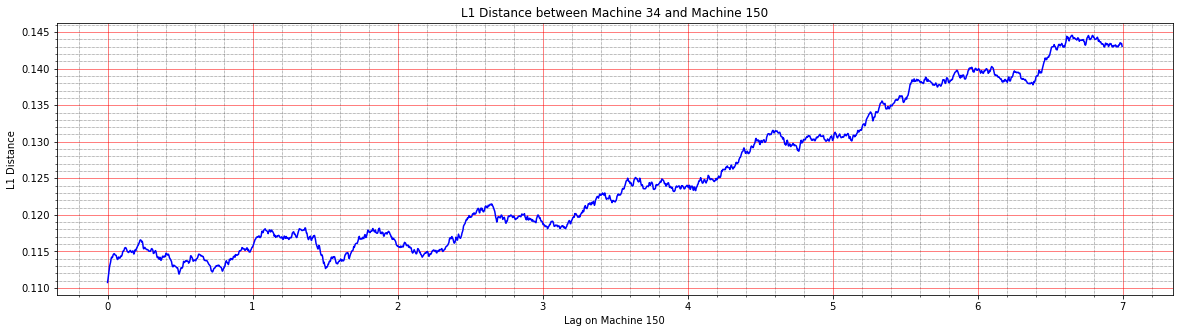

In [68]:
temp = l1_with_lag(full_cpu[34], full_cpu[150])
plot_l1_with_lag(34, 150, temp)

In [69]:
l1_details(34,150, temp)

Lowest L1 happen at index 0 with value: 0.11075280008017112
L1 at index 0 has value: 0.11075280008017112
Different between lowest L1 with L1 without lag: 0.0


,Full CPU Index 1,Full CPU Index 2,Index of Smallest L1,Smallest L1,L1 without Lag,Difference
34/150,34.0,150.0,0.0,0.110753,0.110753,0.0


In [79]:
ls = ls_of_l1_ls(random_samples[0:20])

100% (400 of 400) |######################| Elapsed Time: 1:41:26 Time:  1:41:26


In [80]:
l1_matrix(ls, random_samples[0:20], "Difference")

,34,150,352,365,416,464,475,501,565,1033,1416,1537,1638,1674,1768,1931,1980,2201,2682,2834
34,0.000000,0.004286,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
150,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001537,0.000000,0.000000,0.000786,0.004053,0.006371,0.000000,0.002532,0.000000,0.008081,0.004677,0.000545
352,0.000000,0.001366,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004102,0.000000,0.001456,0.000000,0.000000,0.002934,0.000000,0.001701,0.001975
365,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.002917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
416,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001350,0.000000,0.000000,0.000000,0.000000,0.000000,0.001950,0.000000
464,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
475,0.010093,0.023708,0.000625,0.000000,0.00000,0.003696,0.000000,0.000552,0.000000,0.000000,0.000000,0.007708,0.000000,0.000000,0.017822,0.006847,0.004541,0.000000,0.001317,0.002624
501,0.000000,0.002042,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
565,0.000000,0.001827,0.000000,0.000018,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006277,0.001086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000217,0.002018
1033,0.000000,0.002164,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001870,0.000000,0.000000,0.000000


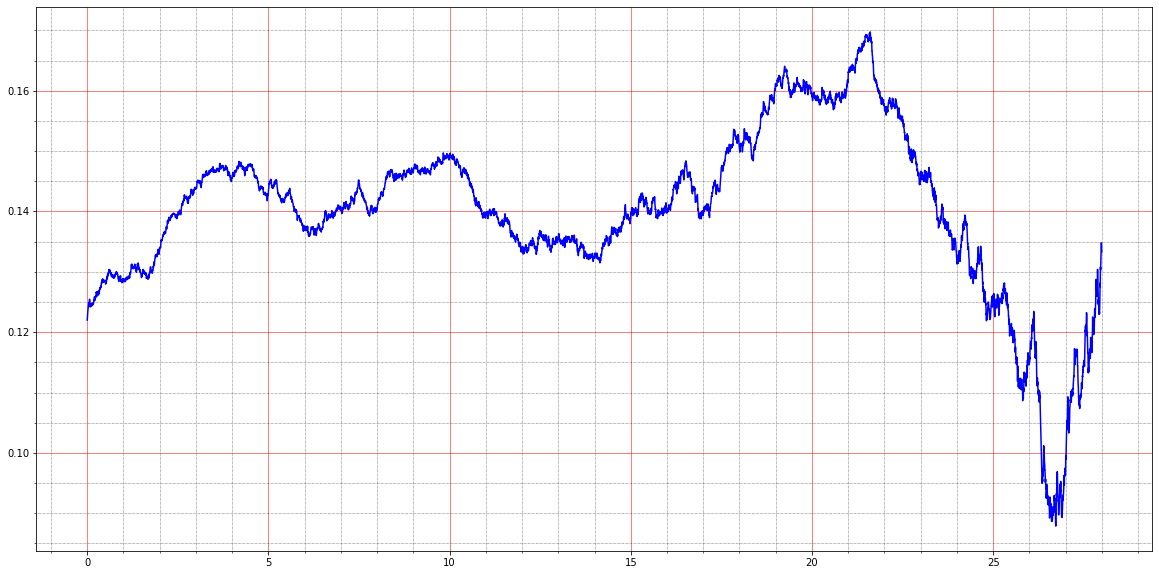

In [60]:
temp = l1_with_lag(full_cpu[352], full_cpu[365], number_of_days = 28)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x_axis[0:len(temp)],temp, color = 'blue')  
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

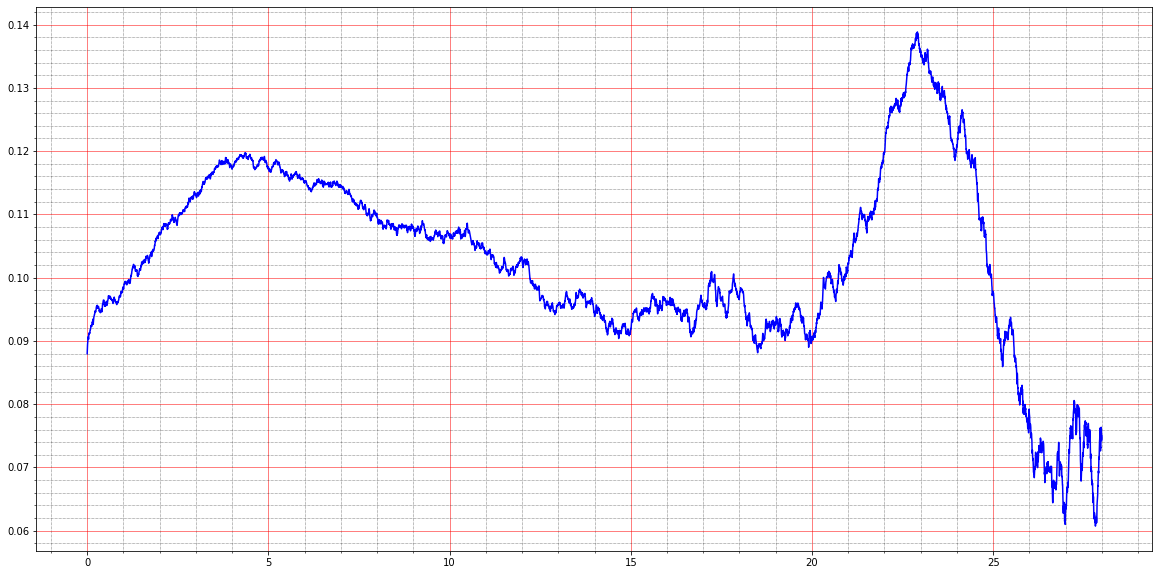

In [61]:
temp = l1_with_lag(full_cpu[416], full_cpu[464], number_of_days = 28)
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x_axis[0:len(temp)],temp, color = 'blue')  
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

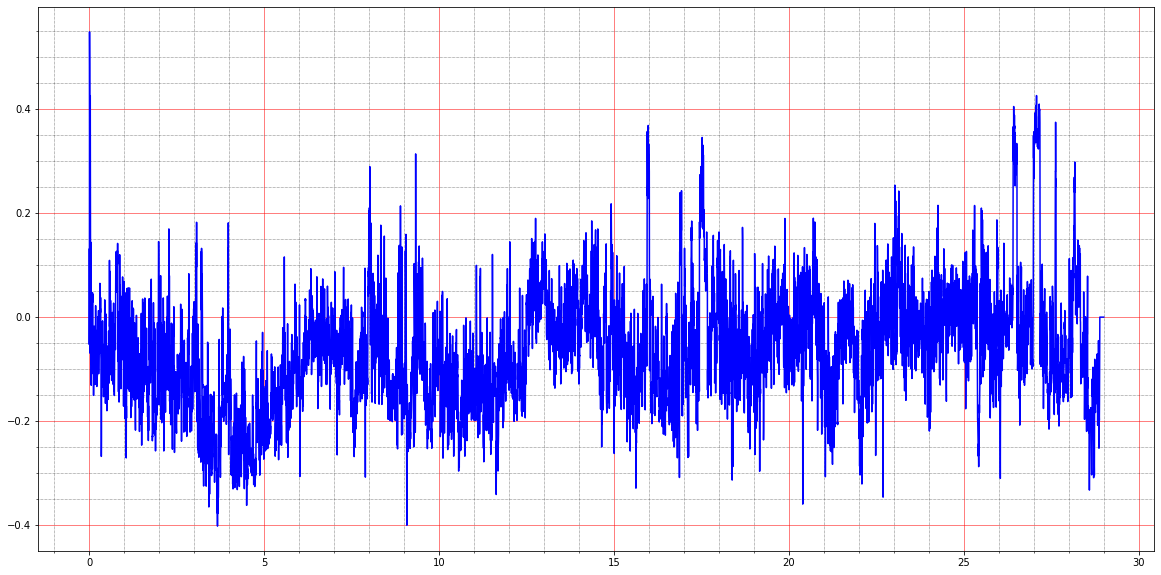

In [5]:
temp = full_cpu[34] - full_cpu[365]
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(x_axis,temp, color = 'blue')  
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [6]:
np.mean(temp)

-0.06627419709984456

In [7]:
np.var(temp)

0.012567350061797065

In [8]:
a = pd.Series([1,2,3,4,5])
b = pd.Series([2,3,4,5,6])
c = b - a
c.sum()

5

In [11]:
d = [-x for x in c]
d

[-1, -1, -1, -1, -1]